In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('ShoppingComplex_Customers_dataset.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,203.000000,203.000000,203.000000,203.000000
mean,102.000000,38.822660,61.596059,50.054187
std,58.745213,13.889168,27.416559,25.836922
min,1.000000,18.000000,15.000000,1.000000
25%,51.500000,29.000000,42.000000,33.000000
50%,102.000000,36.000000,62.000000,50.000000
75%,152.500000,49.000000,78.000000,73.000000
max,203.000000,70.000000,137.000000,99.000000


### Data preprocessing

In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data['Gender']


0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
198      Male
199      Male
200    Female
201      Male
202      Male
Name: Gender, Length: 203, dtype: object

In [13]:
df = pd.get_dummies(data, columns=['Gender'], drop_first=True, dtype=int)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [14]:
#Correlation check
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,1.000000,-0.029584,0.973632,0.003735,0.067348
Age,-0.029584,1.000000,-0.017025,-0.324425,0.052934
Annual Income (k$),0.973632,-0.017025,1.000000,-0.006454,0.070468
Spending Score (1-100),0.003735,-0.324425,-0.006454,1.000000,-0.054971
Gender_Male,0.067348,0.052934,0.070468,-0.054971,1.000000


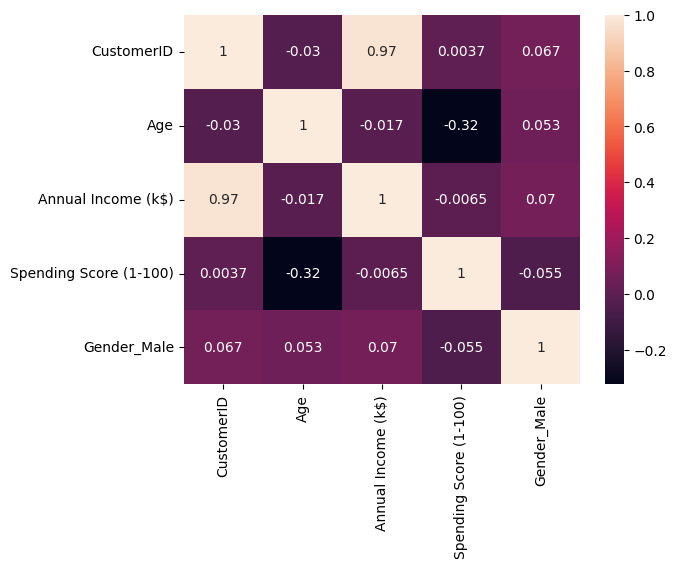

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.show()

### Feature Engineering

In [16]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [17]:

df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


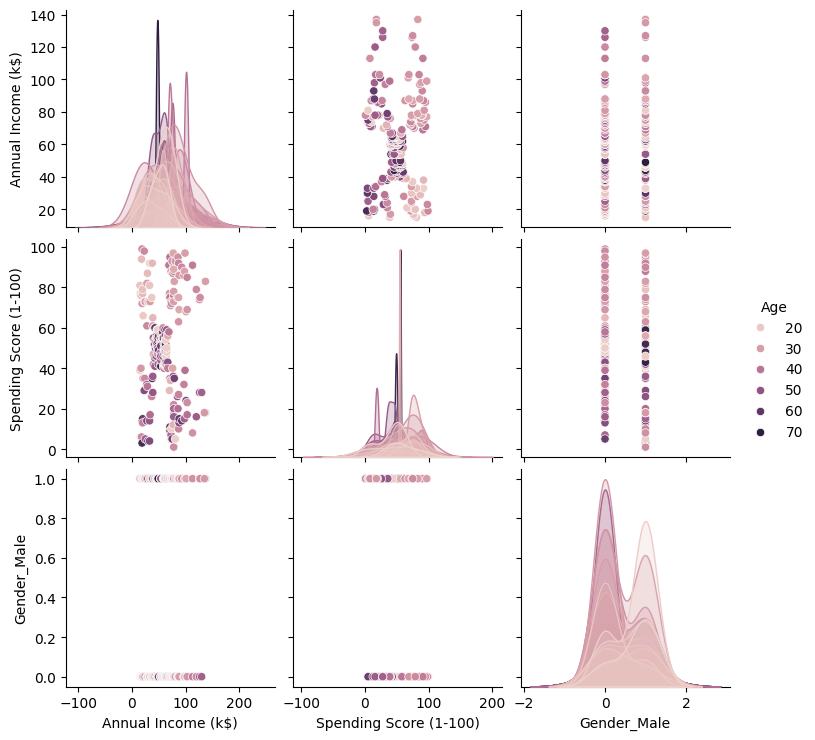

In [20]:
sns.pairplot(df,hue='Age')

In [21]:
#Scaling of feature
ssc=StandardScaler()
new_df=ssc.fit_transform(df)
df1=pd.DataFrame(new_df,columns=['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male'])
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.430731,-1.703761,-0.428902,1.120516
1,-1.286378,-1.703761,1.200697,1.120516
2,-1.358555,-1.667196,-1.709302,-0.892446
3,-1.142025,-1.667196,1.045497,-0.892446
4,-0.564613,-1.630632,-0.390102,-0.892446


### Finding Correct Values of K(Cluster)

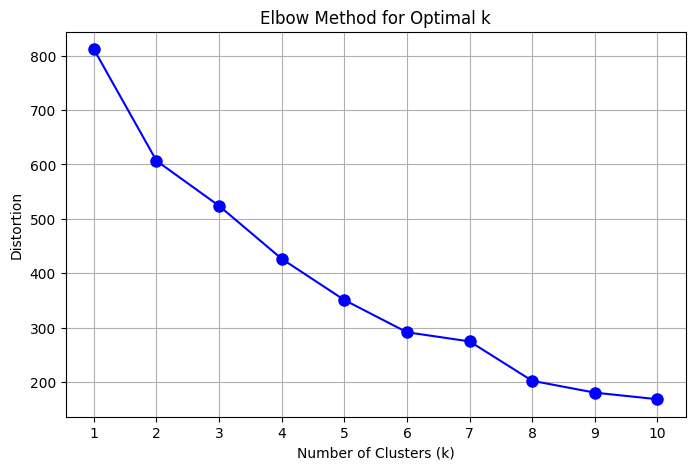

In [25]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    distortions.append(kmeans.inertia_)

# Step 3: Plot the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.xticks(K)
plt.grid()
plt.show()

### Model Building

In [30]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
predicted_values=kmeans.fit_predict(df1)
predicted_values=predicted_values+1

In [31]:
pred=pd.DataFrame(predicted_values,columns=['Predicted_Cluster'],index=df.index.copy())

In [32]:
pred

,Predicted_Cluster
0,3
1,3
2,3
3,3
4,3
...,...
198,2
199,2
200,4
201,2


In [36]:
df_out = pd.merge(df, pred, how = 'left', left_index = True, right_index = True)

In [37]:
df_out

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Predicted_Cluster
0,19,15,39,1,3
1,21,15,81,1,3
2,20,16,6,0,3
3,23,16,77,0,3
4,31,17,40,0,3
...,...,...,...,...,...
198,32,137,18,1,2
199,30,137,83,1,2
200,46,130,28,0,4
201,34,127,75,1,2


In [38]:
df_out.groupby(by='Predicted_Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Predicted_Cluster,,,,
1,54.367647,51.235294,35.691176,0.397059
2,33.625000,81.833333,50.333333,1.000000
3,25.972973,29.486486,65.702703,0.405405
4,32.180000,80.020000,57.740000,0.000000


### Cluster Interpretations

- **Cluster 1**:

Age: Older customers (54 years old on average).
Annual Income: Moderate income ($51k).
Spending Score: Low spending (35).
Gender: Slightly more females (Male percentage 40%).

-**Conclusion**: This cluster likely represents older customers with moderate income but low spending habits. They may not be highly engaged shoppers.

- **Cluster 2**:

Age: Middle-aged customers (34 years old on average).
Annual Income: High income ($82k).
Spending Score: Moderate spending (50).
Gender: All males (100%).

-**Conclusion**: This cluster represents middle-aged, high-income male customers with moderate spending. They could be potential high-value customers if incentivized to spend more.

-**Cluster 3**:

Age: Young customers (26 years old on average).
Annual Income: Low income ($29k).
Spending Score: High spending (66).
Gender: Slightly more females (Male percentage 40%).

-**Conclusion**: This cluster represents younger, low-income customers who spend a significant amount. They might be spending on small-value but frequent purchases and could be targeted for budget-friendly offers.      

-**Cluster 4**
Age: Middle-aged customers (32 years old on average).
Annual Income: High income ($80k).
Spending Score: High spending (58).
Gender: All females (0% males).

-**Conclusion**: This cluster represents middle-aged, high-income female customers who spend a good amount. They are likely engaged shoppers and can be targeted with premium offers or loyalty programs.